<div style="text-align: center; background-color: #002845; padding: 20px;font-family: 'Agency FB', sans-serif;">
    <h1 style="color:#fff ; font-size: 50px;"> Analyse et Prédiction de la consommation d'énergie en France </h1>
    <h2 style="color: #00cfcc; font-size: 28px;">BENHAMIDA Mohamed elamine  (M1 ISD)</h2>

   
</div>



**Choix du Sujet :**

Pour notre projet, nous avons opté pour une étude approfondie de la consommation d'électricité et de gaz en France.  Cette analyse s'inscrit dans le cadre de la compréhension des tendances énergétiques nationales, en mettant particulièrement l'accent sur les variations régionales et en prenant en compte les variations sectorielles. Nous avons sélectionné une base de données provenant du site officiel du gouvernement français : [Lien vers la base de données](https://www.data.gouv.fr/fr/datasets/5bf39f229ce2e77b7d0059b6/).

Nous allons aussi faire un modèle prédictif de la consommation électrique à partir des données journalières et horaires. En utilisant les données détaillées heure par heure, nous allons construire un modèle qui nous permettra de prédire la consommation électrique dans le futur. Nous allons utiliser cette base de données pour le modèle prédictif.

**Objectifs du Projet :**

L'objectif principal de notre projet est de détailler et de comprendre les schémas de consommation d'électricité et de gaz en France sur une période allant de l'année 2012 à 2021 afin de pouvoir prédire de manière précise la consommation future. Nous nous concentrerons sur plusieurs aspects, y compris la consommation par secteur (agriculture, industrie, résidentiel, tertiaire) et les variations au fil des années. Afin de pouvoir réaliser un modèle prédictif précis, nous utiliserons une échelle plus appropriée qui est la consommation heure par heure.

**Variables d'Intérêt :**

Les variables précises de notre analyse sont les régions, les dates, la consommation par secteur et la consommation totale. Nous utiliserons ces variables pour non seulement analyser la consommation électrique et gazière mais aussi pour pouvoir prédire de manière précise les consommations futures.

**Source des Données :**

Les données nécessaires à notre analyse seront extraites du portail gouvernemental de données ouvertes de la France, disponible à l'adresse [https://www.data.gouv.fr/fr/datasets/5bf39f229ce2e77b7d0059b6/](https://www.data.gouv.fr/fr/datasets/5bf39f229ce2e77b7d0059b6/). 

Pour la consommation journalière, nous allons utiliser cette base de données ouverte au public qui donne la consommation électrique heure par heure en France
[https://odre.opendatasoft.com/explore/dataset/eco2mix-national-cons-def/download/?format=csv&disjunctive.nature=true&q=date_heure:%5B2014-12-07T23:00:00Z+TO+2022-11-08T22:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"](https://odre.opendatasoft.com/explore/dataset/eco2mix-national-cons-def/download/?format=csv&disjunctive.nature=true&q=date_heure:%5B2014-12-07T23:00:00Z+TO+2022-11-08T22:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B")



*Benhamida Mohamed Elamine (M1 ISD)*



 

<div style="background-color: #f2f2f2; padding: 20px; font-family: 'Agency FB';">
    <h2 style="text-align: center; color: #333; font-family: 'Agency FB';">I. ANALYSE DE LA CONSOMMATION D'ÉLECTRICITÉ ET DE GAZ EN FRANCE</h2>
</div>

In [2]:
# Librairies nécessaires :

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output 
import plotly.express as px



In [3]:
#Importation de la base de données
url="https://www.data.gouv.fr/fr/datasets/r/cf01f71c-2886-44bc-9ca0-f640fd9972f6"
data=pd.read_csv(url, sep=";", on_bad_lines='skip', engine="python")
 

In [4]:
#Nettoyage de la base de données et supression des valeurs manquantes
data=data[data['code_regions'] != '0']
data=data.sort_values(by='code_regions')  
data=data.drop_duplicates()
data = data.dropna()  
na_count = data.isna().sum()
data.fillna('')


,annee,code_epci,libelle_epci,code_departements,libelle_departements,code_regions,libelle_regions,consoa,consoi,consor,...,e_operateurs,g_consoa,g_consoi,g_consor,g_consot,g_consona,g_consototale,g_operateurs,geo_shape,centroid
6984,2016,200018653,CA Cap Excellence,971,Guadeloupe,1,Guadeloupe,0.000,0.000,0.000,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[-61.542470476, 16.21373351...","16.26372618,-61.537781259"
8406,2021,200041507,CA La Riviera du Levant,971,Guadeloupe,1,Guadeloupe,909.714,4483.333,148618.232,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[-61.109916561, 16.17324967...","16.260206093,-61.340346663"
12107,2020,249710047,CC de Marie-Galante,971,Guadeloupe,1,Guadeloupe,55.103,2593.986,17894.979,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[-61.259509478, 15.87118022...","15.931918103,-61.268663265"
7963,2014,249710070,CA Grand Sud Caraïbe,971,Guadeloupe,1,Guadeloupe,0.000,0.000,0.000,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[-61.611083906, 15.83955689...","16.049166096,-61.676643556"
2561,2020,249710070,CA Grand Sud Caraïbe,971,Guadeloupe,1,Guadeloupe,576.315,11305.436,121943.350,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[-61.611083906, 15.83955689...","16.049166096,-61.676643556"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2012,200067049,CC Spelunca-Liamone,2A,Corse-du-Sud,94,Corse,0.000,0.000,0.000,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[8.857168035, 42.330982057]...","42.190156795,8.791287678"
5152,2013,200067049,CC Spelunca-Liamone,2A,Corse-du-Sud,94,Corse,0.000,0.000,0.000,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[8.857168035, 42.330982057]...","42.190156795,8.791287678"
1949,2015,200073138,CC Pasquale Paoli,2B,Haute-Corse,94,Corse,0.000,0.000,0.000,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[9.347004641, 42.329671493]...","42.388490983,9.122519766"
11165,2021,242020071,CC du Centre Corse,2B,Haute-Corse,94,Corse,914.638,1734.477,31311.523,...,EdF-SEI,0.0,0.0,0.0,0.0,0.0,0.0,0,"{""coordinates"": [[[[9.245436853, 42.227983429]...","42.225541766,9.124426554"


In [5]:
#On crée un nouveau data_frame à partir du 1er qui donne la consommation électrique par région et par an
summed_df_by_region=data.groupby(['code_regions','annee']).sum(True).reset_index()
summed_df_by_region['code_region1'] = summed_df_by_region['code_regions'].str[:2]
summed_df_by_region['code_region2']= summed_df_by_region['code_regions'].str[-2:]
melted_df = pd.melt(summed_df_by_region, id_vars=['annee','consoa','consoi','consor','consot','consona','consototale',
                                                  'e_consoa','e_consoi','e_consor','e_consot','e_consona','e_consototale',
                                                  'g_consoa','g_consoi','g_consor','g_consot','g_consona','g_consototale'],value_vars=['code_region1', 'code_region2'], var_name='region_type', value_name='region')
sums_by_region = melted_df.groupby(['region','annee']).sum(True).reset_index()
sums_by_region=sums_by_region.sort_values(by='region')
sums_by_region['region'] = sums_by_region['region'].astype('int64')
sums_by_region=sums_by_region.sort_values(by='annee').reset_index()
region_mapping = {1: 'Guadeloupe', 2: 'Martinique', 3: 'Guyane', 4: 'La Réunion', 6:'Mayotte', 11:'Ile-de-France',
                 24: 'Centre-Val-de-Loire', 27: 'Bourgogne', 28:'Normandie', 32:'Hauts-de-France',  44:'Grand Est',
                 52: 'Pays de la Loire', 53: 'Bretagne', 75: 'Nouvelle-Aquitaine', 76: 'Occitanie',
                 84: 'Auvergne-Rhone-Alpes', 93: "Provence-Alpes-Côte d'Azur", 94: 'Corse'}
sums_by_region['nom_region'] = sums_by_region['region'].map(region_mapping)
new_data = sums_by_region[['annee', 'region', 'nom_region', 'consoa','consoi','consor','consot',
                                 'consona','consototale','e_consoa','e_consoi','e_consor','e_consot','e_consona','e_consototale',
                                 'g_consoa','g_consoi','g_consor','g_consot','g_consona','g_consototale']]

new_data

,annee,region,nom_region,consoa,consoi,consor,consot,consona,consototale,e_consoa,...,e_consor,e_consot,e_consona,e_consototale,g_consoa,g_consoi,g_consor,g_consot,g_consona,g_consototale
0,2012,1,Guadeloupe,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.006784e+06,3.006784e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,3.006784e+06,3.006784e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2012,32,Hauts-de-France,5.769056e+05,1.013111e+08,6.441348e+07,2.233077e+07,6.941741e+05,1.893265e+08,4.218316e+05,...,2.675224e+07,1.281698e+07,1.753902e+05,7.735851e+07,155074.000000,6.411907e+07,3.766124e+07,9.513794e+06,5.187840e+05,1.119680e+08
2,2012,4,La Réunion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.930152e+06,4.930152e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,4.930152e+06,4.930152e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,2012,3,Guyane,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.495418e+06,1.495418e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,1.495418e+06,1.495418e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,2012,44,Grand Est,4.866631e+05,1.065773e+08,6.306741e+07,2.276925e+07,1.713695e+06,1.946143e+08,2.615802e+05,...,2.703398e+07,1.179415e+07,6.489127e+05,7.106914e+07,225082.900000,7.524678e+07,3.603343e+07,1.097510e+07,1.064783e+06,1.235452e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2021,44,Grand Est,1.413189e+06,1.244973e+08,5.871074e+07,3.962754e+07,3.428407e+06,2.276772e+08,1.026394e+06,...,2.672188e+07,2.020932e+07,2.109899e+06,8.258861e+07,386795.268448,9.197623e+07,3.198886e+07,1.941822e+07,1.318507e+06,1.450886e+08
173,2021,32,Hauts-de-France,1.378019e+06,1.193559e+08,5.108010e+07,2.955558e+07,4.569733e+05,2.018266e+08,1.220202e+06,...,2.263345e+07,1.702964e+07,3.655615e+05,7.600525e+07,157817.200100,8.459953e+07,2.844665e+07,1.252593e+07,9.141184e+04,1.258213e+08
174,2021,4,La Réunion,4.286641e+04,5.729268e+05,2.587321e+06,2.307141e+06,1.284654e+05,5.638720e+06,4.286641e+04,...,2.587321e+06,2.307141e+06,1.284654e+05,5.638720e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
175,2021,93,Provence-Alpes-Côte d'Azur,1.180791e+06,7.269141e+07,4.200986e+07,3.156227e+07,1.605269e+05,1.476049e+08,5.480344e+05,...,3.012262e+07,2.312285e+07,1.133982e+05,7.133162e+07,632756.356740,5.526669e+07,1.188724e+07,8.439423e+06,4.712875e+04,7.627324e+07


In [6]:
regions = new_data['nom_region'].unique()

# Création de l'application Dash
app = dash.Dash(__name__)

# Mise en page de l'application
app.layout = html.Div([
    html.H1("Analyse de la Consommation d'Énergie par Région"),

    # Sélection de la région
    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': region, 'value': region} for region in regions],
        value=regions[0],  # Valeur par défaut
        multi=False,
        style={'width': '50%'}
    ),

    # Graphique de l'évolution de la consommation totale
    dcc.Graph(id='line-plot'),

    # Graphique de répartition par type
    dcc.Graph(id='stacked-bar-plot'),

    # Graphique de comparaison électricité et gaz
    dcc.Graph(id='comparison-plot'),

    # Nouveaux composants ajoutés
    html.H1("Histogramme de la Consommation d'Électricité par Région"),

    # Sélection de l'année
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in new_data['annee'].unique()],
        value=new_data['annee'].max(),  # Valeur par défaut
        multi=False,
        style={'width': '50%', 'margin-bottom': '20px'}
    ),

    # Histogramme de la consommation d'électricité par région
    dcc.Graph(id='histogram-plot', className='custom-chart')
])

# Fonction pour générer le graphique en fonction de la région sélectionnée
def generate_line_plot(selected_region):
    filtered_data = new_data[new_data['nom_region'] == selected_region]
    fig = px.line(filtered_data, x='annee', y='consototale', title=f'Évolution de la Consommation Totale d\'Électricité  pour la Région {selected_region}')
    return fig

# Fonction pour générer le graphique de répartition par type
def generate_stacked_bar_plot(selected_region):
    filtered_data = new_data[new_data['nom_region'] == selected_region]
    fig = px.bar(filtered_data, x='annee', y=['consoa', 'consoi', 'consor', 'consot', 'consona'],
                 title=f'Répartition de la Consommation par Type pour la Région {selected_region}',
                 labels={'value': 'Consommation', 'variable': 'Type'},
                 barmode='stack')
    return fig

# Fonction pour générer le graphique de comparaison électricité et gaz
def generate_comparison_plot(selected_region):
    filtered_data = new_data[new_data['nom_region'] == selected_region]
    fig = px.line(filtered_data, x='annee', y=['e_consototale', 'g_consototale'],
                  title=f'Comparaison de la Consommation d\'Électricité et de Gaz pour la Région {selected_region}')
    return fig

# Fonction pour générer l'histogramme en fonction de l'année sélectionnée
def generate_histogram(selected_year):
    filtered_data = new_data[new_data['annee'] == selected_year]
    fig = px.bar(filtered_data, x='nom_region', y='e_consototale', color='nom_region',
                 labels={'e_consototale': 'Consommation d\'Électricité'},
                 title=f'Consommation d\'Électricité en {selected_year} par Région',
                 color_discrete_sequence=['blue'])  # Utilisez la couleur bleue (ou une autre couleur de votre choix)
    return fig

# Liaison des fonctions de mise à jour des graphiques à la sélection de la région
@app.callback(
    [Output('line-plot', 'figure'),
     Output('stacked-bar-plot', 'figure'),
     Output('comparison-plot', 'figure')],
    [Input('region-dropdown', 'value')]
)
def update_plots(selected_region):
    line_plot = generate_line_plot(selected_region)
    stacked_bar_plot = generate_stacked_bar_plot(selected_region)
    comparison_plot = generate_comparison_plot(selected_region)
    return line_plot , comparison_plot ,stacked_bar_plot 

# Liaison de la fonction de mise à jour de l'histogramme à la sélection de l'année
@app.callback(
    Output('histogram-plot', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_histogram(selected_year):
    histogram_plot = generate_histogram(selected_year)
    return histogram_plot

# Exécution de l'application
if __name__ == '__main__':
    app.run_server(debug=True)

<div style="background-color: #f2f2f2; padding: 20px; font-family: 'Agency FB';">
    <h2 style="text-align: center; color: #333; font-family: 'Agency FB';">II. PREDICTION</h2>
</div>

In [32]:
pip install Prophet 

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Librairies nécessaires : 

import os #télécharger les données / éviter de re-télécharger à chaque fois
import pooch 
from IPython import get_ipython

from prophet import Prophet 
import time
from datetime import datetime
from ipywidgets import widgets, interact, interactive, fixed, interact_manual 
import matplotlib
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import pylab 
from pylab import rcParams #paramètres de style 
import warnings 
warnings.filterwarnings("ignore") #pour se débarasser des warnings


register_matplotlib_converters()
color_pal = sns.color_palette()
color_pal1 = sns.color_palette("viridis" , as_cmap=True)

%matplotlib inline

In [34]:
#Paramètre de style :
pylab.style.use('fivethirtyeight')
params = {'legend.fontsize': 'x-large',
          'figure.figsize':(20, 6),
          'lines.linewidth': 1.8,
          'axes.labelsize': 'x-large',
          'axes.titleweight': 'bold',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params) 

# Versions utilisées :


In [35]:
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Matplotlib : " + str(matplotlib.__version__))
print("Seaborn : " + str(sns.__version__))  

Pandas : 2.1.4
Numpy : 1.24.3
Matplotlib : 3.7.2
Seaborn : 0.12.2


# Création de la base de données

## Télécharger les données 

In [36]:
#Création du fichier 'consommation_elc.csv' à partit de l'url (url1 : 7 Décembre 2014 -> 31 Mai 2022)

url1 = "https://odre.opendatasoft.com/explore/dataset/eco2mix-national-cons-def/download/?format=csv&disjunctive.nature=true&q=date_heure:%5B2014-12-07T23:00:00Z+TO+2022-11-08T22:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
path_target = './consommation_elec.csv'
path, fname = os.path.split(path_target)
pooch.retrieve(url1, path=path, fname=fname, known_hash=None)

'C:\\Users\\Abdelmoumen\\Desktop\\consommation_elec.csv'

In [37]:
# Chargement du dataset "consommation_elec.csv":
data = pd.read_csv("consommation_elec.csv", delimiter=";", comment="#", na_values="n/d",parse_dates=['Date et Heure'], converters={'heure' : str})
data 

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2015-03-20,03:30,2015-03-20 03:30:00+01:00,53193.0,52500,52600,279.0,1067.0,...,10.0,1949.0,221.0,96.0,4297.0,742.0,-1.0,523.0,229.0,210.0
1,France,Données définitives,2015-03-20,04:00,2015-03-20 04:00:00+01:00,52166.0,51600,51500,278.0,1021.0,...,10.0,1948.0,224.0,55.0,4270.0,492.0,-1.0,521.0,229.0,211.0
2,France,Données définitives,2015-03-20,04:30,2015-03-20 04:30:00+01:00,52090.0,51500,51500,278.0,1068.0,...,11.0,1947.0,204.0,52.0,4294.0,515.0,-1.0,518.0,229.0,212.0
3,France,Données définitives,2015-03-20,06:30,2015-03-20 06:30:00+01:00,59956.0,59900,59700,277.0,1746.0,...,11.0,2019.0,153.0,52.0,5016.0,1633.0,7.0,518.0,224.0,211.0
4,France,Données définitives,2015-03-20,08:15,2015-03-20 08:15:00+01:00,NaN,65600,66500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262267,France,Données définitives,2019-10-24,17:00,2019-10-24 17:00:00+02:00,51387.0,51500,50200,87.0,16.0,...,0.0,521.0,4105.0,51.0,5039.0,1327.0,529.0,470.0,299.0,303.0
262268,France,Données définitives,2019-10-24,18:00,2019-10-24 18:00:00+02:00,51788.0,52200,51200,86.0,16.0,...,0.0,523.0,4240.0,50.0,5248.0,1697.0,1062.0,474.0,288.0,312.0
262269,France,Données définitives,2019-10-24,18:30,2019-10-24 18:30:00+02:00,53323.0,53500,52700,85.0,13.0,...,0.0,512.0,4196.0,53.0,5409.0,1651.0,1157.0,469.0,284.0,312.0
262270,France,Données définitives,2019-10-24,19:30,2019-10-24 19:30:00+02:00,58605.0,58400,58000,85.0,14.0,...,0.0,511.0,4327.0,53.0,5653.0,1937.0,1853.0,463.0,281.0,312.0


##  Nettoyage des données 

In [38]:
#Restriction des données sur les modalités "date et heure" et "consommation" 
dfr = data.copy()
dfr = data[['Date et Heure', 'Consommation (MW)']]                   
dfr = dfr.rename(columns={'Date et Heure' : 'ds', 'Consommation (MW)' : 'y'})
dfr = dfr.dropna() #supprimer les valeurs aberrantes 
dfr['ds'] = pd.to_datetime(dfr['ds'] , utc=True).dt.tz_localize(None)  #convertir l'objet 'ds' en datetime / supprimer timezone
dfr = dfr.sort_values(by = 'ds', ascending = True) #ordonner la colonne 'ds'  dans l'ordre croissant
dfr = dfr.set_index('ds') 

##  Aperçu des données : 

In [39]:
dfr.head(10) 

,y
ds,
2014-12-07 23:00:00,65815.0
2014-12-07 23:30:00,64332.0
2014-12-08 00:00:00,61708.0
2014-12-08 00:30:00,61292.0
2014-12-08 01:00:00,60926.0
2014-12-08 01:30:00,60602.0
2014-12-08 02:00:00,58808.0
2014-12-08 02:30:00,57848.0
2014-12-08 03:00:00,56853.0


In [40]:
dfr.index 

DatetimeIndex(['2014-12-07 23:00:00', '2014-12-07 23:30:00',
               '2014-12-08 00:00:00', '2014-12-08 00:30:00',
               '2014-12-08 01:00:00', '2014-12-08 01:30:00',
               '2014-12-08 02:00:00', '2014-12-08 02:30:00',
               '2014-12-08 03:00:00', '2014-12-08 03:30:00',
               ...
               '2022-05-31 17:00:00', '2022-05-31 17:30:00',
               '2022-05-31 18:00:00', '2022-05-31 18:30:00',
               '2022-05-31 19:00:00', '2022-05-31 19:30:00',
               '2022-05-31 20:00:00', '2022-05-31 20:30:00',
               '2022-05-31 21:00:00', '2022-05-31 21:30:00'],
              dtype='datetime64[ns]', name='ds', length=131136, freq=None)

In [41]:
#Création du fichier 'consommation_2022.csv' à partit de l'url (url2 : 01 Juin 2022 -> 30 Novembre 2022)
url2="https://odre.opendatasoft.com/explore/dataset/eco2mix-national-tr/download/?format=csv&disjunctive.nature=true&q=date_heure:%5B2022-05-31T22:00:00Z+TO+2022-11-29T22:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
path_target = './consommation_2022.csv'
path, fname = os.path.split(path_target)
pooch.retrieve(url2, path=path, fname=fname, known_hash=None) 

'C:\\Users\\Abdelmoumen\\Desktop\\consommation_2022.csv'

In [42]:
# Chargement du dataset "consommation_2022.csv"
data1 = pd.read_csv("consommation_2022.csv", delimiter=";", comment="#", na_values="n/d", parse_dates=['Date - Heure'], converters={'heure' : str})
data1

,Périmètre,Nature,Date,Heure,Date - Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW),Stockage batterie (MW),Déstockage batterie (MW)
0,France,Données temps réel,2022-06-21,22:45,2022-06-21 22:45:00+02:00,48437,48500,48950,599,25,...,2786,0,4087,1745,734,160,303,274,ND,ND
1,France,Données temps réel,2022-06-21,23:15,2022-06-21 23:15:00+02:00,47679,49100,49400,597,25,...,2644,0,3902,1293,678,163,296,274,ND,ND
2,France,Données temps réel,2022-06-22,00:00,2022-06-22 00:00:00+02:00,45857,45100,46000,603,25,...,2259,0,3816,1094,85,166,296,274,ND,ND
3,France,Données temps réel,2022-06-22,01:45,2022-06-22 01:45:00+02:00,41491,40750,41600,136,28,...,2518,0,3282,557,2,168,295,274,ND,ND
4,France,Données temps réel,2022-06-22,02:00,2022-06-22 02:00:00+02:00,40818,40600,41000,136,26,...,2477,0,3293,567,2,170,301,274,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,France,Données temps réel,2022-07-22,22:15,2022-07-22 22:15:00+02:00,47184,47150,48350,566,35,...,4093,0,3359,1837,578,180,317,275,ND,ND
17468,France,Données temps réel,2022-07-22,23:00,2022-07-22 23:00:00+02:00,48215,49300,50500,568,36,...,4148,0,3391,1945,1585,177,320,275,ND,ND
17469,France,Données temps réel,2022-07-22,23:30,2022-07-22 23:30:00+02:00,46924,48200,49400,139,36,...,4157,0,3212,1662,933,172,317,275,ND,ND
17470,France,Données temps réel,2022-07-22,23:45,2022-07-22 23:45:00+02:00,46789,46900,48300,139,37,...,4209,0,3198,1588,1029,176,315,275,ND,ND


## Nettoyage 

In [43]:
#Restriction des données sur les modalités "date - heure" et "consommation" 
dfr1 = data1.copy()
dfr1 = data1[['Date - Heure', 'Consommation (MW)']]                   
dfr1 = dfr1.rename(columns={'Date - Heure' : 'ds', 'Consommation (MW)' : 'y'})
dfr1 = dfr1.dropna()
dfr1['ds'] = pd.to_datetime(dfr1['ds'], utc=True).dt.tz_localize(None) #convertir l'objet 'ds' en datetime/ supprimer timezone
dfr1 = dfr1.sort_values(by='ds', ascending=True) 
dfr1 = dfr1.set_index('ds')
dfr1 = dfr1.resample('30T').mean() #aggrégation des données (la moyenne de conso par demi-heure)

In [44]:
dfr1.tail()

,y
ds,
2022-11-29 20:30:00,58182.0
2022-11-29 21:00:00,57275.5
2022-11-29 21:30:00,58408.5
2022-11-29 22:00:00,58450.0
2022-11-29 22:30:00,57859.5


In [45]:
df = pd.concat([dfr, dfr1])
df.index

DatetimeIndex(['2014-12-07 23:00:00', '2014-12-07 23:30:00',
               '2014-12-08 00:00:00', '2014-12-08 00:30:00',
               '2014-12-08 01:00:00', '2014-12-08 01:30:00',
               '2014-12-08 02:00:00', '2014-12-08 02:30:00',
               '2014-12-08 03:00:00', '2014-12-08 03:30:00',
               ...
               '2022-11-29 18:00:00', '2022-11-29 18:30:00',
               '2022-11-29 19:00:00', '2022-11-29 19:30:00',
               '2022-11-29 20:00:00', '2022-11-29 20:30:00',
               '2022-11-29 21:00:00', '2022-11-29 21:30:00',
               '2022-11-29 22:00:00', '2022-11-29 22:30:00'],
              dtype='datetime64[ns]', name='ds', length=139874, freq=None)

In [46]:
df.tail(10)

,y
ds,
2022-11-29 18:00:00,67148.5
2022-11-29 18:30:00,66011.5
2022-11-29 19:00:00,63955.5
2022-11-29 19:30:00,61706.5
2022-11-29 20:00:00,59879.0
2022-11-29 20:30:00,58182.0
2022-11-29 21:00:00,57275.5
2022-11-29 21:30:00,58408.5
2022-11-29 22:00:00,58450.0


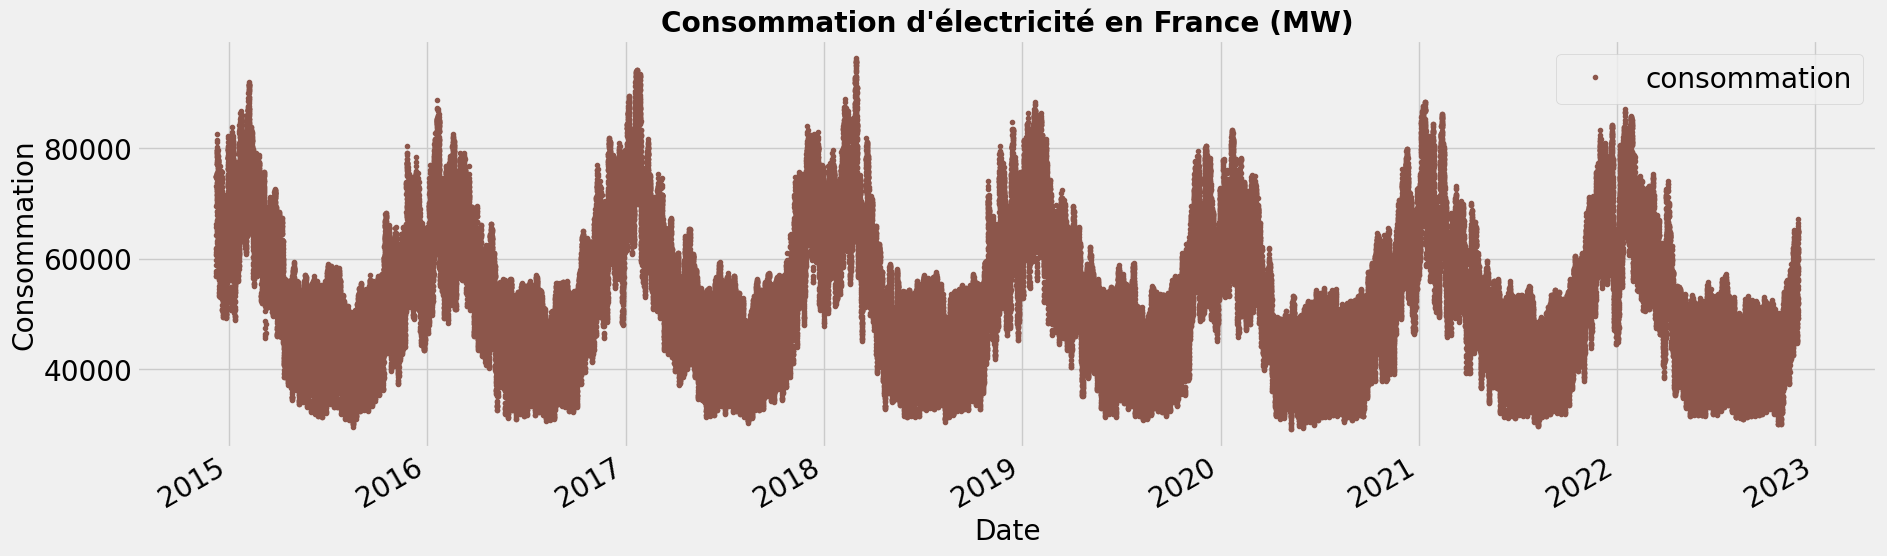

In [47]:
df1 = df.rename(columns = {'y':'consommation'})
df1.plot(style='.', color = color_pal[5])
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.title("Consommation d'électricité en France (MW)")
plt.show()
#plt.savefig('conso_fr.pdf')

##  Visualisation de la consommation d'éléctricité pour un jour donné :

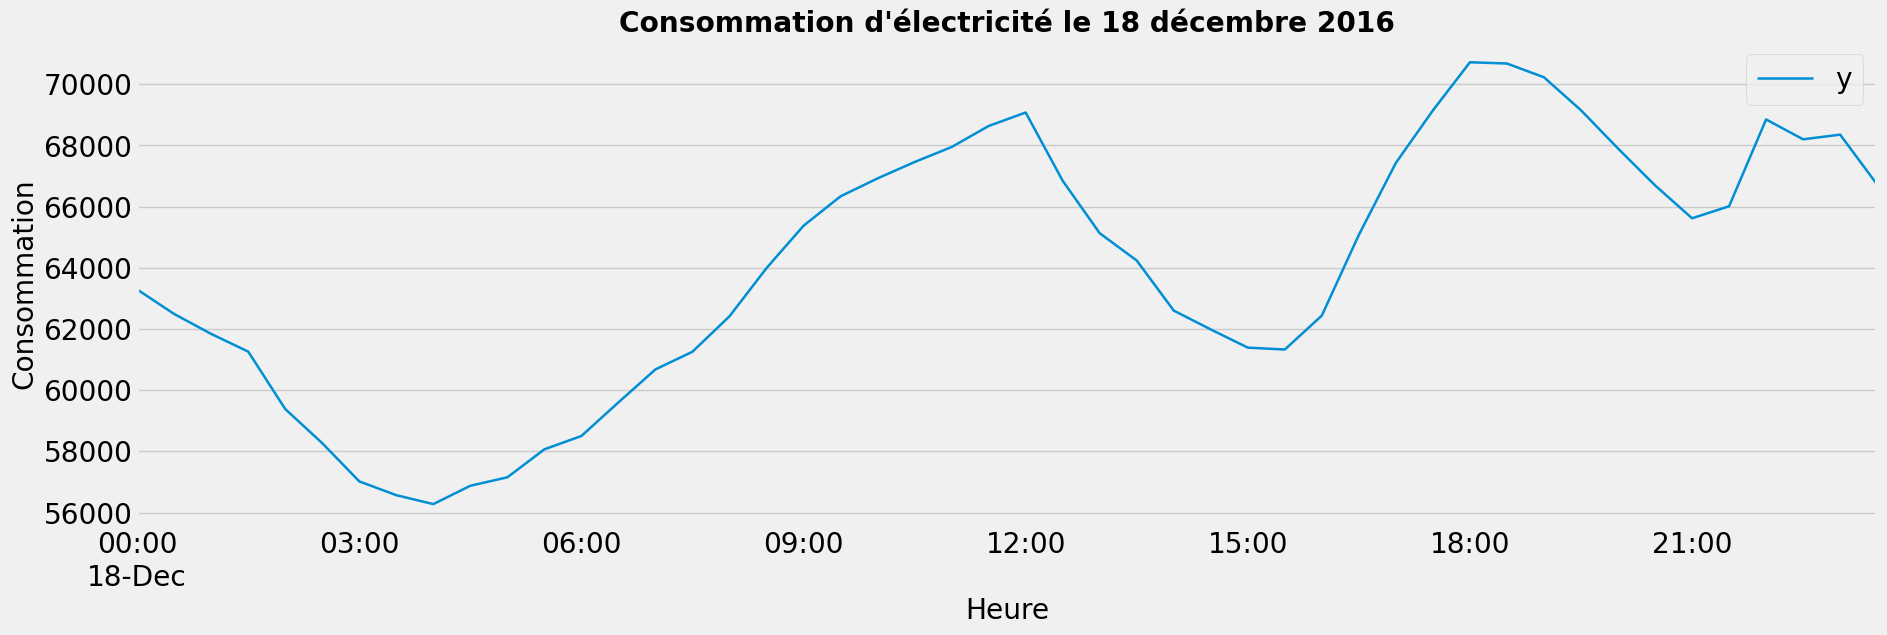

In [48]:
df.loc['2016-12-18'].plot()
plt.xlabel("Heure")
plt.ylabel("Consommation")
plt.title("Consommation d'électricité le 18 décembre 2016")
plt.show()

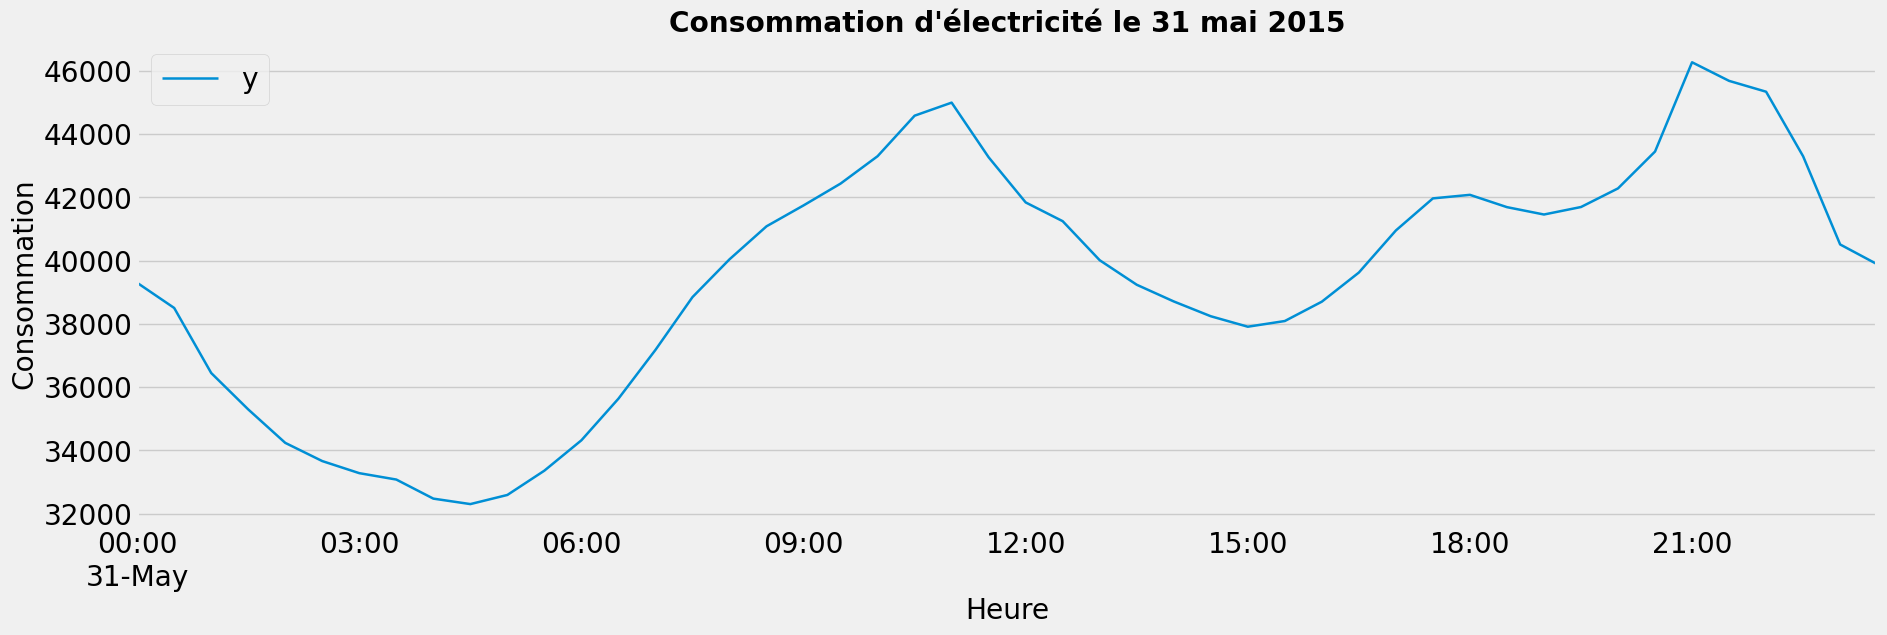

Exception in thread Thread-7 (<lambda>):
Traceback (most recent call last):
  File "C:\Users\Abdelmoumen\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\Abdelmoumen\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Abdelmoumen\anaconda3\Lib\site-packages\dash\dash.py", line 1756, in <lambda>
    target=lambda: _watch.watch(
                   ^^^^^^^^^^^^^
  File "C:\Users\Abdelmoumen\anaconda3\Lib\site-packages\dash\_watch.py", line 35, in watch
    walk()
  File "C:\Users\Abdelmoumen\anaconda3\Lib\site-packages\dash\_watch.py", line 20, in walk
    info = os.stat(path)
           ^^^^^^^^^^^^^
FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'C:\\Users\\Abdelmoumen\\anaconda3\\Lib\\site-packages\\dash\\html\\__pycache__\\I.cpython-311-pytest-7.4.0.pyc.42820'


In [49]:
df.loc['2015-05-31'].plot()
plt.xlabel("Heure")
plt.ylabel("Consommation")
plt.title("Consommation d'électricité le 31 mai 2015")
plt.show() 

## 2- Création du modèle / test :

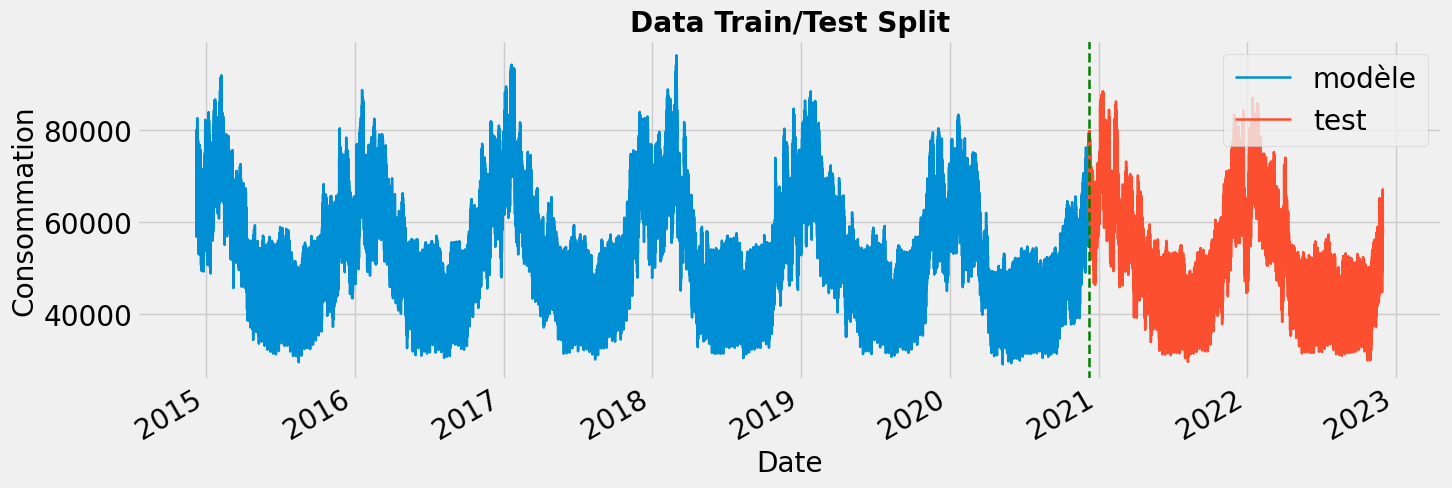

In [19]:
train = df.iloc[df.index < '2020-12-08']
test = df.iloc[df.index >= '2020-12-08']

# Visualisation train/test split :
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-12-08', color='green', ls='--')
ax.legend(['modèle', 'test'])
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.show()
#plt.savefig("data_train_test.pdf") 

In [20]:
df_cons = df.reset_index()
df_cons 

,ds,y
0,2014-12-07 23:00:00,65815.0
1,2014-12-07 23:30:00,64332.0
2,2014-12-08 00:00:00,61708.0
3,2014-12-08 00:30:00,61292.0
4,2014-12-08 01:00:00,60926.0
...,...,...
139869,2022-11-29 20:30:00,58182.0
139870,2022-11-29 21:00:00,57275.5
139871,2022-11-29 21:30:00,58408.5
139872,2022-11-29 22:00:00,58450.0


In [21]:
#train model : 
m = Prophet()
m.fit(df_cons)
future = m.make_future_dataframe(periods=2*48, freq='30min', include_history=False)
forecast = m.predict(future) 

14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:21:57 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-29 23:00:00,49798.372108,57893.895856,68799.190462,49798.372108,49798.372108,13380.730580,13380.730580,13380.730580,-1491.568642,...,2001.728606,2001.728606,2001.728606,12870.570616,12870.570616,12870.570616,0.0,0.0,0.0,63179.102688
1,2022-11-29 23:30:00,49798.203922,57215.204774,67737.467204,49798.203922,49798.203922,12608.461698,12608.461698,12608.461698,-2271.249215,...,2001.458438,2001.458438,2001.458438,12878.252475,12878.252475,12878.252475,0.0,0.0,0.0,62406.665621
2,2022-11-30 00:00:00,49798.035737,56047.984261,66836.553906,49798.035737,49798.035737,11595.672723,11595.672723,11595.672723,-3292.535132,...,2002.297544,2002.297544,2002.297544,12885.910311,12885.910311,12885.910311,0.0,0.0,0.0,61393.708460
3,2022-11-30 00:30:00,49797.867552,54774.418945,65895.593139,49797.867552,49797.867552,10376.560449,10376.560449,10376.560449,-4521.211330,...,2004.227693,2004.227693,2004.227693,12893.544086,12893.544086,12893.544086,0.0,0.0,0.0,60174.428000
4,2022-11-30 01:00:00,49797.699366,53627.432798,64349.203366,49797.699366,49797.699366,9058.057247,9058.057247,9058.057247,-5850.322571,...,2007.226056,2007.226056,2007.226056,12901.153761,12901.153761,12901.153761,0.0,0.0,0.0,58855.756613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2022-12-01 20:30:00,49783.067235,60673.768780,71645.384807,49783.067235,49783.067235,16481.709695,16481.709695,16481.709695,997.503441,...,2017.263317,2017.263317,2017.263317,13466.942937,13466.942937,13466.942937,0.0,0.0,0.0,66264.776930
92,2022-12-01 21:00:00,49782.899050,60212.547492,71308.382290,49782.899050,49782.899050,15908.806347,15908.806347,15908.806347,432.175968,...,2004.331811,2004.331811,2004.331811,13472.298567,13472.298567,13472.298567,0.0,0.0,0.0,65691.705396
93,2022-12-01 21:30:00,49782.730864,60061.717113,70619.139958,49782.730864,49782.730864,15423.261209,15423.261209,15423.261209,-45.676723,...,1991.310648,1991.310648,1991.310648,13477.627284,13477.627284,13477.627284,0.0,0.0,0.0,65205.992073
94,2022-12-01 22:00:00,49782.562679,59527.638104,70250.312532,49782.562679,49782.562679,14991.655078,14991.655078,14991.655078,-469.438981,...,1978.164997,1978.164997,1978.164997,13482.929062,13482.929062,13482.929062,0.0,0.0,0.0,64774.217757


In [24]:
#Train model :
train_pr = train.reset_index()
model = Prophet()
model.fit(train_pr) 

14:22:31 - cmdstanpy - INFO - Chain [1] start processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
#Predict on test_pr set : 
test_pr = test.reset_index()
test_frc = model.predict(test_pr) 

In [26]:
test_frc.head() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-08 00:00:00,50370.483571,58088.212206,69269.759940,50370.483571,50370.483571,13331.565834,13331.565834,13331.565834,-3217.884861,...,2461.546502,2461.546502,2461.546502,14087.904193,14087.904193,14087.904193,0.0,0.0,0.0,63702.049405
1,2020-12-08 00:30:00,50370.442651,57256.402067,67360.998079,50370.442651,50370.442651,12055.755442,12055.755442,12055.755442,-4505.802598,...,2478.037240,2478.037240,2478.037240,14083.520801,14083.520801,14083.520801,0.0,0.0,0.0,62426.198093
2,2020-12-08 01:00:00,50370.401731,55605.484984,66455.989876,50370.401731,50370.401731,10675.976289,10675.976289,10675.976289,-5894.666535,...,2491.527458,2491.527458,2491.527458,14079.115366,14079.115366,14079.115366,0.0,0.0,0.0,61046.378020
3,2020-12-08 01:30:00,50370.360811,54088.186572,65187.068792,50370.360811,50370.360811,9362.359605,9362.359605,9362.359605,-7214.467420,...,2502.139100,2502.139100,2502.139100,14074.687925,14074.687925,14074.687925,0.0,0.0,0.0,59732.720416
4,2020-12-08 02:00:00,50370.319891,53061.975131,63785.911739,50370.319891,50370.319891,8309.385985,8309.385985,8309.385985,-8270.850486,...,2509.997955,2509.997955,2509.997955,14070.238516,14070.238516,14070.238516,0.0,0.0,0.0,58679.705876


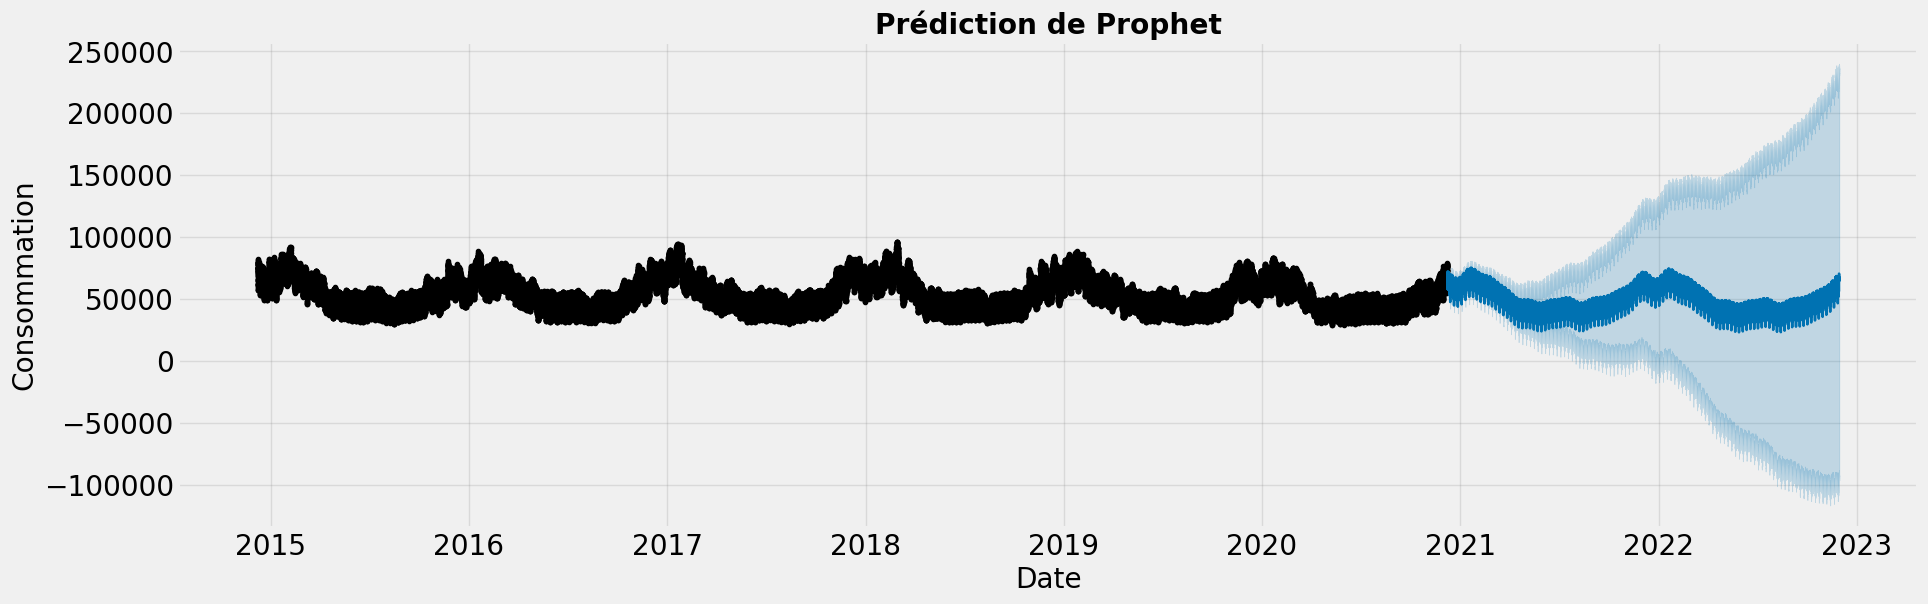

In [27]:
fig, ax = plt.subplots()
fig = model.plot(test_frc, ax=ax)
ax.set_title('Prédiction de Prophet')
plt.xlabel("Date")
plt.ylabel("Consommation")
plt.show()
#plt.savefig("predic_pro1.pdf") 

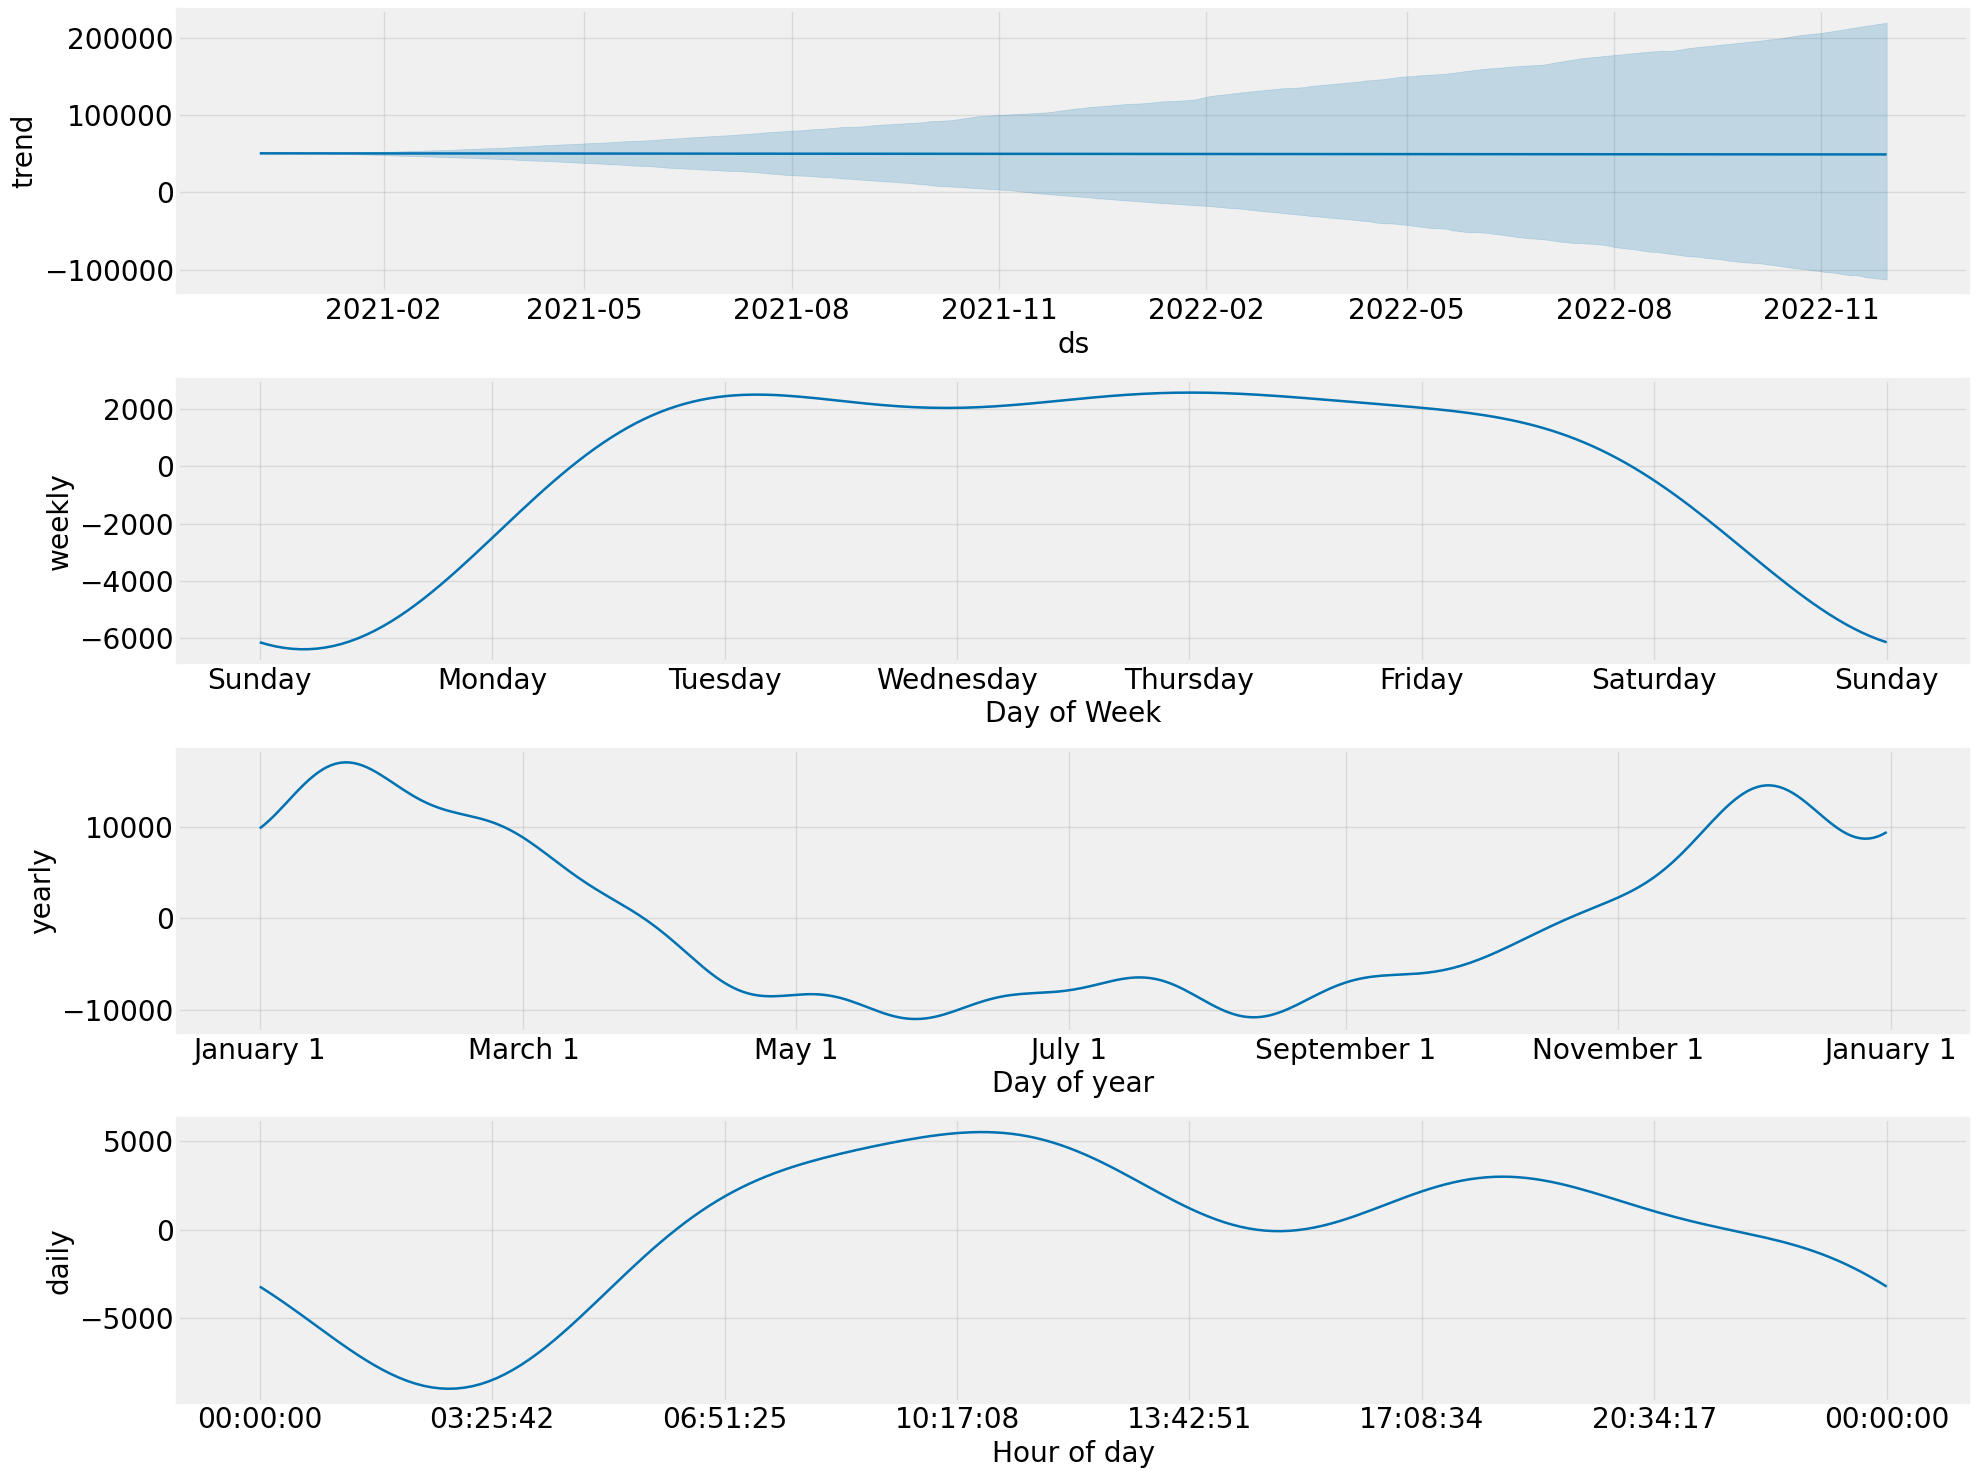

In [28]:
#model components :
fig = model.plot_components(test_frc, figsize=(20,15))
plt.show()
#plt.savefig("components.pdf")

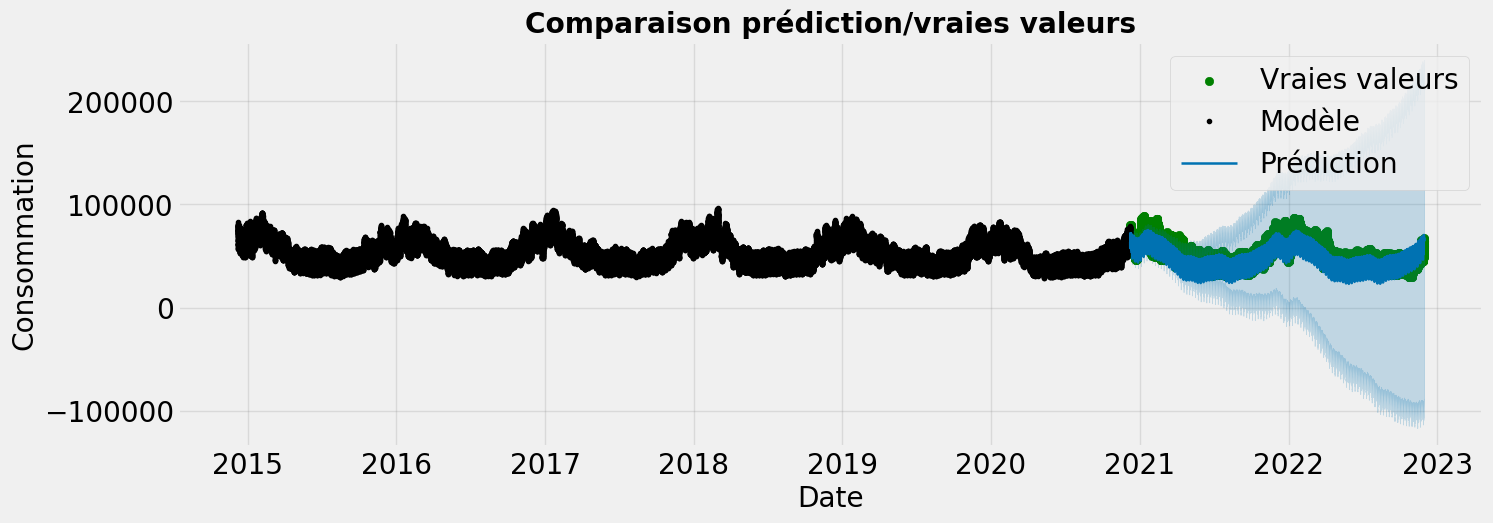

In [29]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test, color='g')
fig = model.plot(test_frc, ax=ax)
ax.set_title("Comparaison prédiction/vraies valeurs")
plt.xlabel("Date")
plt.ylabel("Consommation")
ax.legend(['Vraies valeurs', 'Modèle', 'Prédiction']) 

## 4- Prise en compte de l'effet des vacances: 

In [30]:
model_vac = Prophet(daily_seasonality = False)
model_vac.add_country_holidays(country_name='FR') #base de données des jours fériés 
model_vac.fit(train_pr) 

14:26:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:02 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Predict on training set with model
frc_hol = model_vac.predict(test_pr) 

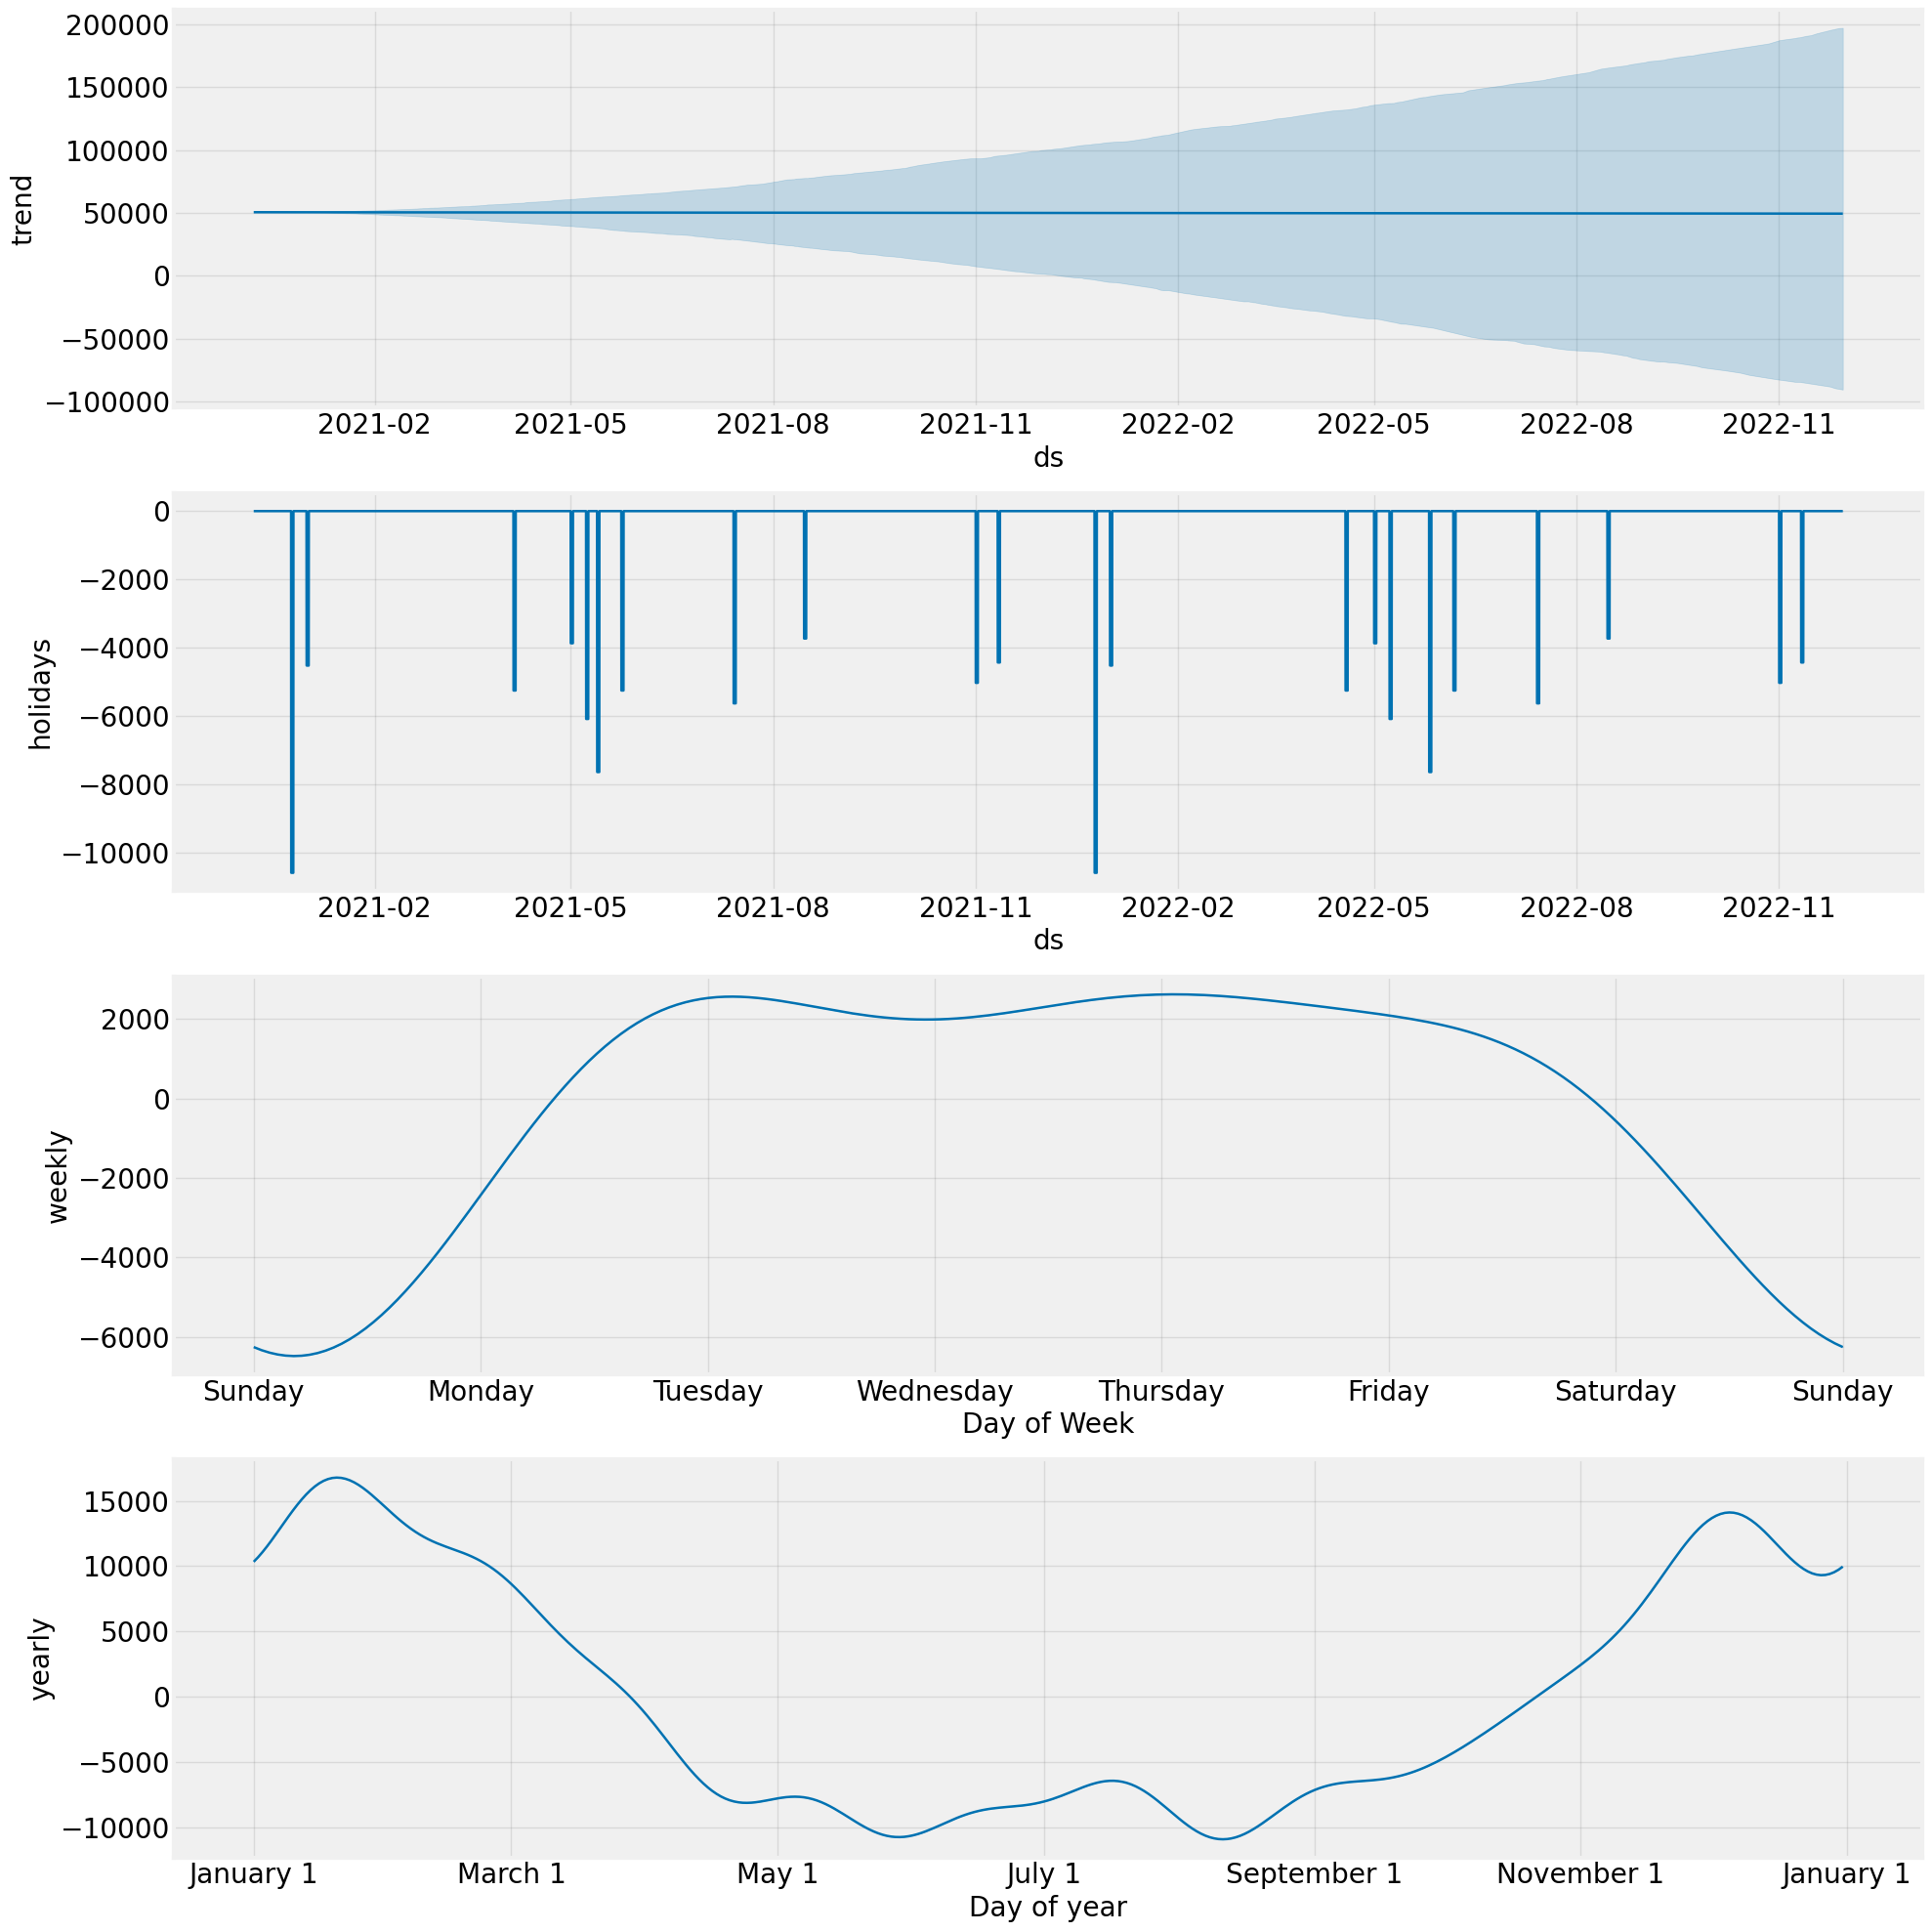

In [38]:
fig = model_vac.plot_components(frc_hol, figsize = (20,20))
plt.show() 

## Comparaison du modèle avec les vraies données: 

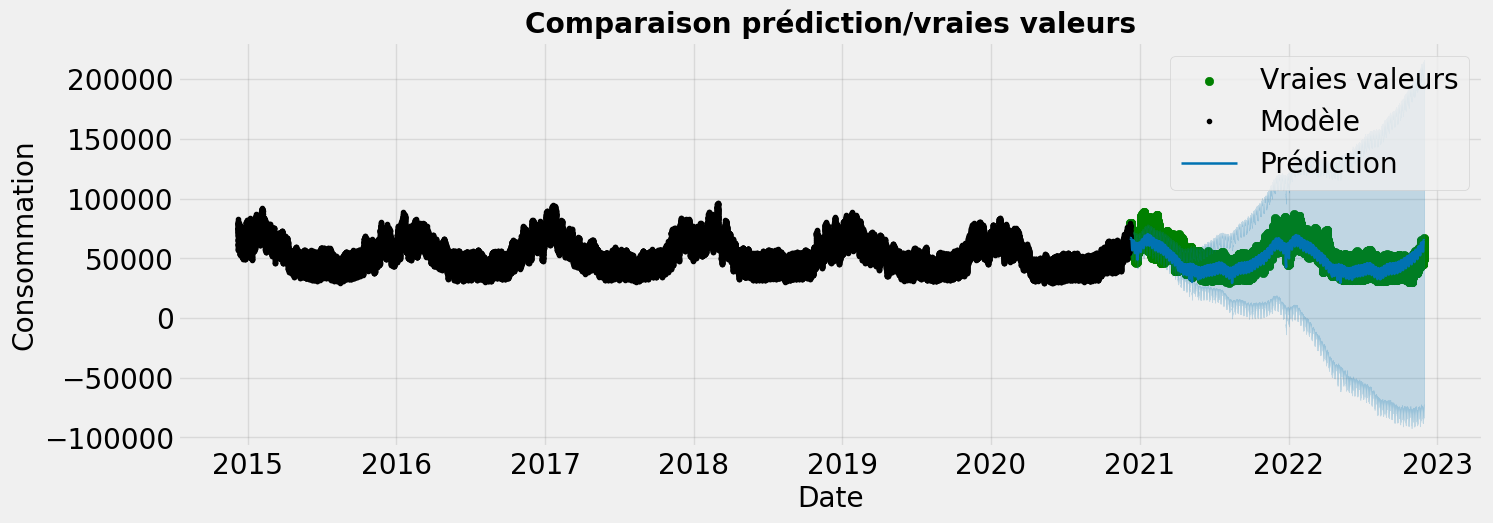

In [39]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize = (15, 5))
ax.scatter(test.index, test, color = 'g')
fig = model_vac.plot(frc_hol, ax = ax)
ax.set_title("Comparaison prédiction/vraies valeurs")
plt.xlabel("Date")
plt.ylabel("Consommation")
ax.legend(['Vraies valeurs', 'Modèle', 'Prédiction']) 

In [40]:
future = model_vac.make_future_dataframe(periods = 2*48, freq = '30min', include_history = False)
forecast = model_vac.predict(future) 

In [41]:
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints' Day,All Saints' Day_lower,All Saints' Day_upper,Armistice Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-08 00:00:00,50634.049030,59682.988380,74280.311299,50634.049030,50634.049030,0.0,0.0,0.0,0.0,...,2534.099976,2534.099976,2534.099976,13863.110846,13863.110846,13863.110846,0.0,0.0,0.0,67031.259853
1,2020-12-08 00:30:00,50634.015963,59795.302701,74555.971417,50634.015963,50634.015963,0.0,0.0,0.0,0.0,...,2547.092381,2547.092381,2547.092381,13859.820463,13859.820463,13859.820463,0.0,0.0,0.0,67040.928806
2,2020-12-08 01:00:00,50633.982895,59435.104369,74403.775661,50633.982895,50633.982895,0.0,0.0,0.0,0.0,...,2557.013031,2557.013031,2557.013031,13856.510085,13856.510085,13856.510085,0.0,0.0,0.0,67047.506012
3,2020-12-08 01:30:00,50633.949828,59287.225542,74017.500583,50633.949828,50633.949828,0.0,0.0,0.0,0.0,...,2563.990849,2563.990849,2563.990849,13853.179745,13853.179745,13853.179745,0.0,0.0,0.0,67051.120421
4,2020-12-08 02:00:00,50633.916760,59475.764591,74038.450434,50633.916760,50633.916760,0.0,0.0,0.0,0.0,...,2568.158708,2568.158708,2568.158708,13849.829472,13849.829472,13849.829472,0.0,0.0,0.0,67051.904941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-12-09 21:30:00,50631.039882,59243.667232,74062.683963,50631.039882,50631.039882,0.0,0.0,0.0,0.0,...,2599.512989,2599.512989,2599.512989,13485.964537,13485.964537,13485.964537,0.0,0.0,0.0,66716.517408
92,2020-12-09 22:00:00,50631.006814,59383.437487,73896.540962,50631.006814,50631.006814,0.0,0.0,0.0,0.0,...,2606.277823,2606.277823,2606.277823,13480.999750,13480.999750,13480.999750,0.0,0.0,0.0,66718.284387
93,2020-12-09 22:30:00,50630.973747,59674.445114,74032.652199,50630.973747,50630.973747,0.0,0.0,0.0,0.0,...,2612.089915,2612.089915,2612.089915,13476.018413,13476.018413,13476.018413,0.0,0.0,0.0,66719.082075
94,2020-12-09 23:00:00,50630.940679,58927.274203,73895.756837,50630.940679,50630.940679,0.0,0.0,0.0,0.0,...,2616.943420,2616.943420,2616.943420,13471.020572,13471.020572,13471.020572,0.0,0.0,0.0,66718.904671


Conclusion : les jours fériés n'ont pas un énorme impact sur notre prédiction, nous allons reprendre le modèle initial et l'utiliser pour faire nos prévisions. 

In [42]:
#Prédiction sur 10 jours à partir du 29 novembre :
m = Prophet() 
m.fit(df_cons) #ajuster notre modèle 'm' sur l'ensemble des données 
f = m.make_future_dataframe(periods=48*10 , freq='30min', include_history=False)
predic = m.predict(f) 

14:32:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
s = predic[['ds','yhat','yhat_lower','yhat_upper']] #la colonne 'yhat' contient les prédiction
s 

,ds,yhat,yhat_lower,yhat_upper
0,2022-11-29 23:00:00,63179.102688,57128.619491,68484.981821
1,2022-11-29 23:30:00,62406.665621,56752.254177,67725.919271
2,2022-11-30 00:00:00,61393.708460,56209.279228,67040.316183
3,2022-11-30 00:30:00,60174.428000,54678.525569,65733.770292
4,2022-11-30 01:00:00,58855.756613,53145.611229,64343.395909
...,...,...,...,...
475,2022-12-09 20:30:00,64402.928612,58864.821596,69962.934562
476,2022-12-09 21:00:00,63741.819420,58259.108800,69247.047268
477,2022-12-09 21:30:00,63165.375491,57058.987043,68525.021512
478,2022-12-09 22:00:00,62640.241149,57202.764488,68243.120838


In [44]:
dataframe = pd.DataFrame(s) 

In [45]:
#sélectionner les lignes qui correspondent à la prédiction pour le 8 décembre:
d = dataframe[len(s)-94:434]
d 

,ds,yhat,yhat_lower,yhat_upper
386,2022-12-08 00:00:00,62722.496124,56710.452273,67938.099252
387,2022-12-08 00:30:00,61489.322289,55507.862155,66720.369119
388,2022-12-08 01:00:00,60154.883328,54902.128103,65487.162238
389,2022-12-08 01:30:00,58883.255991,53323.485032,64702.142075
390,2022-12-08 02:00:00,57864.062750,52356.913328,63637.092826
391,2022-12-08 02:30:00,57272.530613,51685.629689,63055.678041
392,2022-12-08 03:00:00,57230.995374,51847.593236,62480.486017
393,2022-12-08 03:30:00,57781.398079,52487.324631,63234.767760
394,2022-12-08 04:00:00,58875.565371,53577.924313,64360.625486
395,2022-12-08 04:30:00,60385.559176,54660.715259,66053.948368


In [46]:
predic_finale = d.rename(columns={'ds' : 'Date et heure', 'yhat' : 'Consommation (MW)', 'yhat_lower' : 'Consommation min', 'yhat_upper' : 'Consommation max'})

In [47]:
#Création du fichier .csv avec nos prédictions:
predic_finale.to_csv(path_or_buf='./prediction_8_dec.csv', sep=';')